In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as p21c

from py21cmfast import global_params
from py21cmfast import plotting


#import logging
#logger = logging.getLogger("21cmFAST")
#logger.setLevel(logging.INFO)

random_seed = 1605

EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap',\
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),\
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

This result was obtained using 21cmFAST at commit 2bb4807c7ef1a41649188a3efc462084f2e3b2e0

# Fiducial and lightcones

Let's fix the initial condition for this tutorial.

In [ ]:
output_dir = '/Users/julian/Dropbox/Research/21/Mturn_21cmFASTv3/outputcode/'
HII_DIM = 128
BOX_LEN = 400 #cell size of ~3 Mpc

# USE_FFTW_WISDOM make FFT faster AND use relative velocities. , 'USE_INTERPOLATION_TABLES': True or code is too slow
user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True, 'USE_INTERPOLATION_TABLES': True, 
               #"FAST_FCOLL_TABLES": True, 
               "USE_RELATIVE_VELOCITIES": True, "POWER_SPECTRUM": 5}

#set FAST_FCOLL_TABLES to TRUE if using minihaloes, it speeds up the generation of tables by ~x30 (see Appendix X of XXX JBM)
#USE_RELATIVE_VELOCITIES is important for minihaloes. If True, POWER_SPECTRUM has to be set to 5 (CLASS) to get the transfers.



initial_conditions = p21c.initial_conditions(user_params=user_params,
                                             random_seed=random_seed, 
                                             direc=output_dir
                                             #, regenerate=True
                                            )



2021-02-03 16:42:22,528 | WARNING | _utils.py::__init__() | The following parameters to UserParams are not supported: ['FAST_FCOLL_TABLES']


In [3]:
# p21c.run_lightcone(redshift=18, max_redshift=25, flag_options={'USE_MINI_HALOS':1}, user_params={'HII_DIM':10, 'USE_INTERPOLATION_TABLES':1}, write=1)

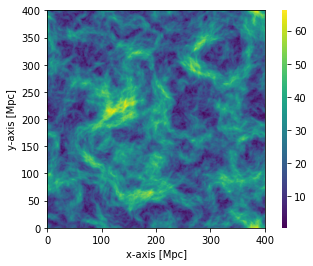

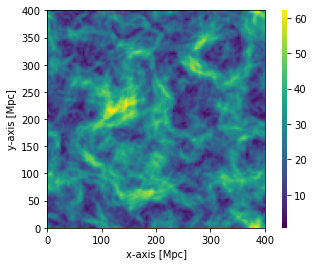

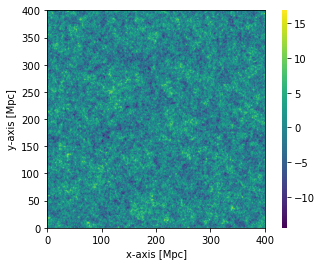

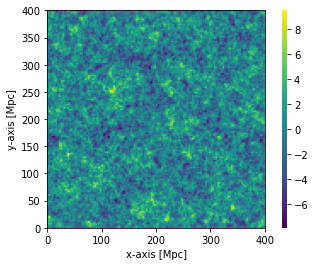

In [4]:
plotting.coeval_sliceplot(initial_conditions, "hires_vcb");
plotting.coeval_sliceplot(initial_conditions, "hires_density");
plotting.coeval_sliceplot(initial_conditions, "lowres_vcb");
plotting.coeval_sliceplot(initial_conditions, "lowres_density");

Let's run a 'fiducial' model and see its lightcones

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1

In [6]:
# the lightcones we want to plot later together with their color maps and min/max
lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
vmins = [-150, 1e1, 0, 0, 5, 0, 0, -1]
vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]


astro_params_vcb = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5, 'ALPHA_STAR_MINI': 0.3,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.25,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 200.0, 'F_H2_SHIELD': 0.0}
astro_params_novcb = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5, 'ALPHA_STAR_MINI': 0.3,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.25,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 200.0, 'F_H2_SHIELD': 0.0, 
                    'A_VCB': 0}
#setting 'A_VCB': 0 sets to zero the effect of relative velocities (fiducial value is 1.0)
#the parameter 'A_LW' (with fid value of 2.0) does the same for LW feedback.



flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 
                    'USE_MINI_HALOS':True, 'FIX_VCB_AVG':False}

flag_options_fid_vavg = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 
                        'USE_MINI_HALOS':True, 'FIX_VCB_AVG':True}

    

In [ ]:
# import numpy as np
# import matplotlib
# %matplotlib inline
# import matplotlib.pyplot as plt
# import torch #not sure why without it it doesnt import 21cmFAST, some unlinked package
# import py21cmfast as p21c

# from py21cmfast import global_params
# from py21cmfast import plotting

# #measure timing
# import time

# #also memory?
# import os
# import psutil


# random_seed = 1605
# output_dir = '/Users/julian/Dropbox/Research/20/Mturn_21cmFASTv3/outputcode/'

# astro_params_vcb = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
#                     'ALPHA_STAR': 0.5, 'ALPHA_STAR_MINI': 0.3,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.25,
#                     'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 200.0, 'F_H2_SHIELD': 0.0}
# flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 
#                     'USE_MINI_HALOS':True, 'FIX_VCB_AVG':False}

# for D1 in [20, 40, 80]:
#     tic = time.perf_counter()
#     user_params1 = {"HII_DIM": D1, "BOX_LEN": (3*D1), "USE_FFTW_WISDOM": True, 'USE_INTERPOLATION_TABLES': True,
#               "USE_RELATIVE_VELOCITIES": True, "POWER_SPECTRUM": 5}
#     ics1 = p21c.initial_conditions(user_params=user_params1,random_seed=random_seed, 
#                                              direc=output_dir, regenerate=True                                            )
#     p21c.run_lightcone(
#         redshift = 10.0,
#         init_box = ics1,
#         flag_options = flag_options_fid,
#         astro_params = astro_params_vcb,
#         random_seed = random_seed,
#         direc = output_dir,
#         write=False, 
#         regenerate=True
#     )

#     toc = time.perf_counter()
#     print(f"Ran coeval with DIM={DD:.1f} in {toc - tic:0.4f} seconds")
    
#     process = psutil.Process(os.getpid())
#     print(process.memory_info().rss/1e6)  # in Mbytes 






In [ ]:
lightcone_fid_vcb = p21c.run_lightcone(
        redshift = 10.0,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_vcb,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir,
        write=True#, regenerate=True
)

    
lightcone_fid_novcb = p21c.run_lightcone(
        redshift = 10.0,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_novcb,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir,
        write=True#, regenerate=True
)

lightcone_fid_vcbavg = p21c.run_lightcone(
        redshift = 10.0,
        init_box = initial_conditions,
        flag_options = flag_options_fid_vavg,
        astro_params = astro_params_vcb,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir,
        write=True#, regenerate=True
)






fig, axs = plt.subplots(len(lightcone_quantities),1,
            figsize=(20,10))#(getattr(lightcone_fid_vcb, lightcone_quantities[0]).shape[2]*0.01,
                     #getattr(lightcone_fid_vcb, lightcone_quantities[0]).shape[1]*0.01*len(lightcone_quantities)))
for ii, lightcone_quantity in enumerate(lightcone_quantities):
    axs[ii].imshow(getattr(lightcone_fid_vcb, lightcone_quantity)[1],
                   vmin=vmins[ii], vmax=vmaxs[ii],cmap=cmaps[ii])
    axs[ii].text(1, 0.05, lightcone_quantity,horizontalalignment='right',verticalalignment='bottom',
            transform=axs[ii].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
    axs[ii].xaxis.set_tick_params(labelsize=10)
    axs[ii].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

In [6]:
# astro_params_vcb_ps = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
#                     'ALPHA_STAR': 0.3,'F_STAR10': -1.75, 'F_STAR7_MINI': -1.25,
#                     'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 200.0, 'F_H2_SHIELD': 0.5}

# flag_options_fid_vavg = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 
#                         'USE_MINI_HALOS':True, 'FIX_VCB_AVG':True}

# lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
# cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
# vmins = [-150, 1e1, 0, 0, 5, 0, 0, -1]
# vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]


# lightcone_fid_powsp = p21c.run_lightcone(
#         redshift = 10.0,
#         init_box = initial_conditions,
#         flag_options = flag_options_fid_vavg,
#         astro_params = astro_params_vcb_ps,
#         lightcone_quantities=lightcone_quantities,
#         global_quantities=lightcone_quantities,
#         random_seed = random_seed,
#         direc = output_dir,
#         write=True, regenerate=True
# )
# #made to have the average suppression in the pow sp


# astro_params_vcb = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
#                     'ALPHA_STAR': 0.3,'F_STAR10': -1.75, 'F_STAR7_MINI': -1.25,
#                     'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 200.0, 'F_H2_SHIELD': 0.0}
# lightcone_fid_vcbavg = p21c.run_lightcone(
#         redshift = 10.0,
#         init_box = initial_conditions,
#         flag_options = flag_options_fid_vavg,
#         astro_params = astro_params_vcb,
#         lightcone_quantities=lightcone_quantities,
#         global_quantities=lightcone_quantities,
#         random_seed = random_seed,
#         direc = output_dir,
#         write=True#, regenerate=True
# )

# #compare vcbavg and vcbavg+matterpowsp

# fig, axs = plt.subplots(2 ,1,
#             figsize=(20,6))

# axs[0].imshow(getattr(lightcone_fid_powsp, 'brightness_temp')[1],
#                vmin=vmins[0], vmax=vmaxs[0],cmap=cmaps[0])
# axs[1].imshow(getattr(lightcone_fid_vcbavg, 'brightness_temp')[1],
#                vmin=vmins[0], vmax=vmaxs[0],cmap=cmaps[0])
# axs[0].text(1, 0.05, 'PowSp' ,horizontalalignment='right',verticalalignment='bottom',
#         transform=axs[0].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
# axs[1].text(1, 0.05, 'noPowSp' ,horizontalalignment='right',verticalalignment='bottom',
#         transform=axs[1].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)                        
# # axs[0].xaxis.set_tick_params(labelsize=10)
# # axs[1].yaxis.set_tick_params(labelsize=0)
# plt.tight_layout()
# fig.subplots_adjust(hspace = 0.01)


# import os

# filenamevcbavPS = lightcone_fid_powsp.save(direc=output_dir)
# print(os.path.basename(filenamevcbavPS))


# global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
# #choose some to plot...
# plot_quantities = ('brightness_temp','Ts_box','xH_box','J_21_LW_box')
# ymins = [-100, 1e1, 0, 0]
# ymaxs = [  30, 1e3, 1, 5]
# linestyles = ['-', '-',':','-.','-.',':']
# colors     = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']
# lws        = [2,2,2,2]

# textss   = ['vcb','vcb']
# factorss = [[0, 1],] * len(textss)
# labelss  = [['NO', 'reference'],] * len(textss)


# fig, axss = plt.subplots(len(plot_quantities), len(labelss),
#                          sharex=True, figsize=(4*len(labelss),2*len(plot_quantities)))

# for pp, texts in enumerate(textss):
#     labels  = labelss[pp]
#     factors = factorss[pp] 
#     axs     = axss[:,pp]
#     for kk, label in enumerate(labels):
#         factor = factors[kk]

        
#         if kk==0:
#             lightcone = lightcone_fid_powsp
#         else:
#             lightcone = lightcone_fid_vcbavg
#         freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)    
#         for jj, global_quantity in enumerate(plot_quantities):
#             axs[jj].plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
#                          color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            
#     axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
#                         transform=axs[0].transAxes,fontsize = 15)
#     for jj, global_quantity in enumerate(plot_quantities):
#         axs[jj].set_ylim(ymins[jj], ymaxs[jj])
#     axs[-1].set_xlabel('Frequency/MHz',fontsize=15)
#     axs[-1].xaxis.set_tick_params(labelsize=15)

#     axs[0].set_xlim(1420.4 / (35 + 1.), 1420.4 / (10. + 1.))
#     zlabels = np.array([10, 13, 18, 25, 35])
#     ax2 = axs[0].twiny()
#     ax2.set_xlim(axs[0].get_xlim())
#     ax2.set_xticks(1420.4 / (zlabels + 1.))
#     ax2.set_xticklabels(zlabels.astype(np.str)) 
#     ax2.set_xlabel("redshift",fontsize=15)
#     ax2.xaxis.set_tick_params(labelsize=15)
#     ax2.grid(False)
    
#     if pp == 0:
#         axs[0].legend(loc='lower right', ncol=2,fontsize=13,fancybox=True,frameon=True)
#         for jj, global_quantity in enumerate(plot_quantities):
#             axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
#             axs[jj].yaxis.set_tick_params(labelsize=15)
#     else:
#         for jj, global_quantity in enumerate(plot_quantities):
#             axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=0)
#             axs[jj].yaxis.set_tick_params(labelsize=0)

# plt.tight_layout()
# fig.subplots_adjust(hspace = 0.0,wspace=0.0)

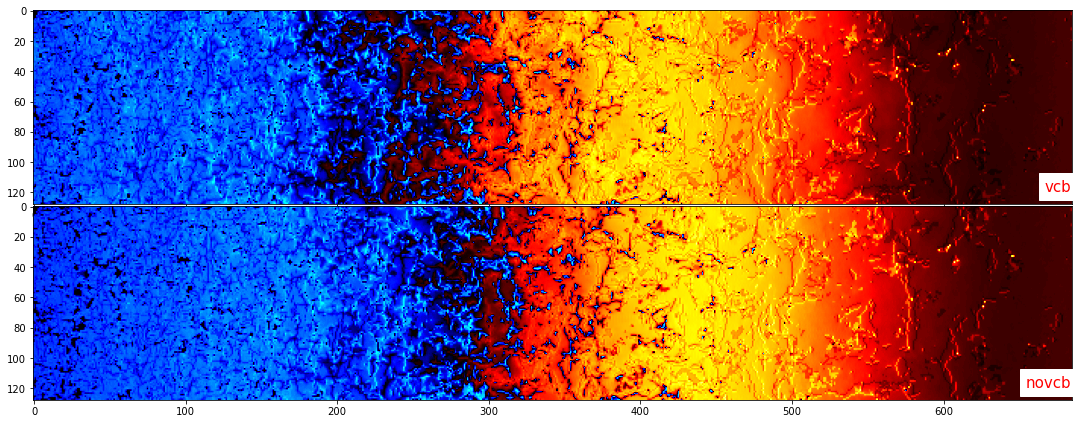

In [6]:
#compare vcb and novcb

fig, axs = plt.subplots(2 ,1,
            figsize=(20,6))

axs[0].imshow(getattr(lightcone_fid_vcb, 'brightness_temp')[1],
               vmin=vmins[0], vmax=vmaxs[0],cmap=cmaps[0])
axs[1].imshow(getattr(lightcone_fid_novcb, 'brightness_temp')[1],
               vmin=vmins[0], vmax=vmaxs[0],cmap=cmaps[0])
axs[0].text(1, 0.05, 'vcb' ,horizontalalignment='right',verticalalignment='bottom',
        transform=axs[0].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
axs[1].text(1, 0.05, 'novcb' ,horizontalalignment='right',verticalalignment='bottom',
        transform=axs[1].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)                        
# axs[0].xaxis.set_tick_params(labelsize=10)
# axs[1].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

In [7]:
import os

filenamevcbavg = lightcone_fid_vcbavg.save(direc=output_dir)
print(os.path.basename(filenamevcbavg))

filenamevcb = lightcone_fid_vcb.save(direc=output_dir)
print(os.path.basename(filenamevcb))

filenamenovcb = lightcone_fid_novcb.save(direc=output_dir)
print(os.path.basename(filenamenovcb))

LightCone_z10.0_a62b023b132799691249952c4b27b664_r1605.h5
LightCone_z10.0_304080c3b819bfe027824874a161e42c_r1605.h5
LightCone_z10.0_49e38a56eb7ad069b25a6dd28a586856_r1605.h5


In [8]:
zlist21=lightcone_fid_vcb.node_redshifts
print(zlist21)
#p21c.plotting.plot_global_history(lightcone_fid_vcb)

zz=zlist21[34]
print(zz)

[35.09129817865038, 34.383626326999504, 33.68983038103482, 33.00963826442862, 32.342783235678176, 31.689003783501413, 31.048043524283656, 30.41965110153524, 29.803580087320494, 29.199588885619548, 28.60744063758496, 28.02690312865608, 27.45774869749467, 26.899754146706126, 26.352700655311263, 25.816373692934313, 25.290562935673535, 24.775062183621404, 24.269669280002056, 23.77418603189427, 23.288418132508905, 22.812175084990294, 22.34527012771175, 21.887520161035837, 21.43874567551073, 20.998770681474493, 20.56742264003964, 20.14453239543097, 19.729934108650085, 19.323465192440608, 18.92496624752861, 18.534281000113186, 18.151256240582754, 17.775741763432947, 17.407590308362618, 17.0466575025248, 16.69280180391001, 16.345884445839708, 16.005769382548056, 15.67232323583077, 15.345415242740025, 15.024917204304966, 14.7107034352577, 14.402650714745047, 14.100638238006729, 13.804547569001043, 13.514262593959444, 13.229669475851814, 12.95065660974458, 12.677114579034155, 12.408936112538544,

In [9]:
#also a coeval box:
coeval_fid_vcb = p21c.run_coeval(
        redshift = zz,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_vcb,
        random_seed = random_seed,
        direc = output_dir,
        write=True#, regenerate=True
)

coeval_fid_vcbavg = p21c.run_coeval(
        redshift = zz,
        init_box = initial_conditions,
        flag_options = flag_options_fid_vavg,
        astro_params = astro_params_vcb,
        random_seed = random_seed,
        direc = output_dir,
        write=True#, regenerate=True
)

In [10]:
# plotting.coeval_sliceplot(coeval_fid_vcb)
# plotting.coeval_sliceplot(coeval_fid_vcbavg)

['lowres_density', 'lowres_vx', 'lowres_vy', 'lowres_vz', 'lowres_vx_2LPT', 'lowres_vy_2LPT', 'lowres_vz_2LPT', 'hires_density', 'hires_vx', 'hires_vy', 'hires_vz', 'hires_vx_2LPT', 'hires_vy_2LPT', 'hires_vz_2LPT', 'lowres_vcb', 'hires_vcb', 'density', 'velocity', 'xH_box', 'Gamma12_box', 'z_re_box', 'dNrec_box', 'temp_kinetic_all_gas', 'Fcoll', 'Fcoll_MINI', 'brightness_temp', 'Ts_box', 'x_e_box', 'Tk_box', 'J_21_LW_box']
25.860006


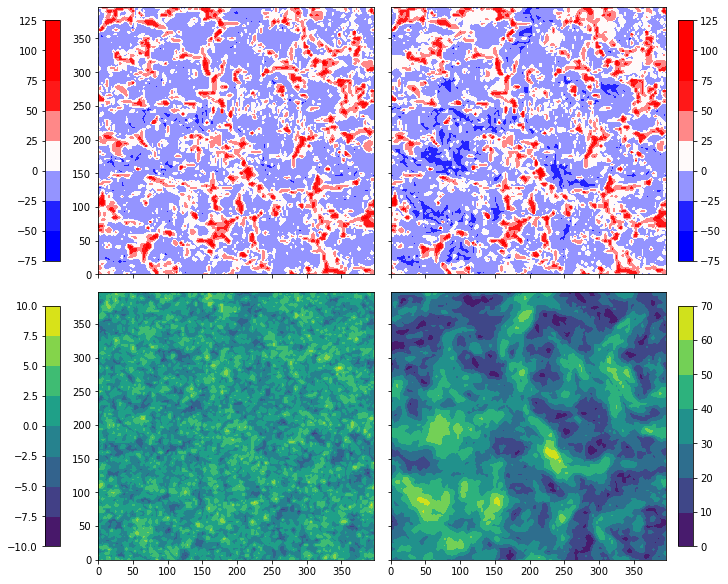

<Figure size 432x288 with 0 Axes>

In [11]:
print(coeval_fid_vcb.get_fields())
T21slice_vcb=coeval_fid_vcb.brightness_temp
T21avg_vcb = np.mean(T21slice_vcb)
dT21slice_vcb = T21slice_vcb - T21avg_vcb

T21slice_novcb=coeval_fid_vcbavg.brightness_temp
T21avg_novcb = np.mean(T21slice_novcb)
dT21slice_novcb = T21slice_novcb - T21avg_novcb



sigma21=np.sqrt(np.var(dT21slice_vcb))

T21maxplot =  3.0*sigma21
T21minplot = -2.0 * sigma21

#print(np.mean(dT21slice_vcb), np.mean(dT21slice_novcb), sigma21, T21minplot, T21maxplot)


origin = 'lower'
extend = 'both'

origin = None
extend = 'neither'

xx = np.linspace(0, BOX_LEN, HII_DIM, endpoint=False)
yy = xx



indexv=30

fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(10,8), 
                       sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

cs0=ax[0,0].contourf(xx, yy, dT21slice_novcb[indexv], extend=extend, origin=origin, 
                   vmin=T21minplot, vmax=T21maxplot,cmap='bwr') 
fig.colorbar(cs0, ax=ax[0,0], shrink=0.9, location='left')
cs1=ax[0,1].contourf(xx, yy, dT21slice_vcb[indexv], extend=extend, origin=origin, 
                   vmin=T21minplot, vmax=T21maxplot,cmap='bwr')
fig.colorbar(cs1, ax=ax[0,1], shrink=0.9)



deltaslice=initial_conditions.lowres_density
deltaavg = np.mean(deltaslice)
ddeltaslice = deltaslice - deltaavg

vcbslice=initial_conditions.lowres_vcb
vcbavg = np.mean(vcbslice)
dvcbslice = vcbslice

print(vcbavg)


#fig, ax = plt.subplots(1, 2, constrained_layout=True,figsize=(10,4))
csd=ax[1,0].contourf(xx, yy, ddeltaslice[indexv]) 
fig.colorbar(csd, ax=ax[1,0], shrink=0.9, location='left')
csv=ax[1,1].contourf(xx, yy, dvcbslice[indexv])
fig.colorbar(csv, ax=ax[1,1], shrink=0.9, extend=extend)
plt.show()

plt.tight_layout()

# for ax1 in ax.flat:
#     ax1.label_outer()

In [12]:
# user_params2 = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True, 'USE_INTERPOLATION_TABLES': True,
#               "USE_RELATIVE_VELOCITIES": False, "POWER_SPECTRUM": 5, 'PERTURB_ON_HIGH_RES': False}
# initial_conditions2 = p21c.initial_conditions(user_params=user_params2,random_seed=random_seed, direc=output_dir, regenerate=True)


# user_params3 = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True, 'USE_INTERPOLATION_TABLES': True,
#               "USE_RELATIVE_VELOCITIES": True, "POWER_SPECTRUM": 5, 'PERTURB_ON_HIGH_RES': False}
# initial_conditions3 = p21c.initial_conditions(user_params=user_params3,random_seed=random_seed, direc=output_dir, regenerate=True)


# plotting.coeval_sliceplot(initial_conditions2, "lowres_vx_2LPT");
# plotting.coeval_sliceplot(initial_conditions3, "lowres_vx_2LPT");

# plotting.coeval_sliceplot(initial_conditions2, "lowres_vx");
# plotting.coeval_sliceplot(initial_conditions3, "lowres_vx");

# plotting.coeval_sliceplot(initial_conditions2, "hires_vx_2LPT");
# plotting.coeval_sliceplot(initial_conditions3, "hires_vx_2LPT");

In [22]:
# #plotting.coeval_sliceplot(initial_conditions3, "lowres_density");
# global_params.EVOLVE_DENSITY_LINEARLY = False
# pp = p21c.perturb_field(redshift = 20.0, init_boxes = initial_conditions3)
# global_params.EVOLVE_DENSITY_LINEARLY = True
# pp2 = p21c.perturb_field(redshift = 20.0, init_boxes = initial_conditions3)
# plotting.coeval_sliceplot(pp, "density");
# plotting.coeval_sliceplot(pp2, "density");



# global_params.EVOLVE_DENSITY_LINEARLY = False
# pp = p21c.perturb_field(redshift = 20.0, init_boxes = initial_conditions2)
# global_params.EVOLVE_DENSITY_LINEARLY = True
# pp2 = p21c.perturb_field(redshift = 20.0, init_boxes = initial_conditions2)
# plotting.coeval_sliceplot(pp, "density");
# plotting.coeval_sliceplot(pp2, "density");

In [13]:
getattr(lightcone_fid_vcb, lightcone_quantities[0]).shape[2]*0.1

68.5

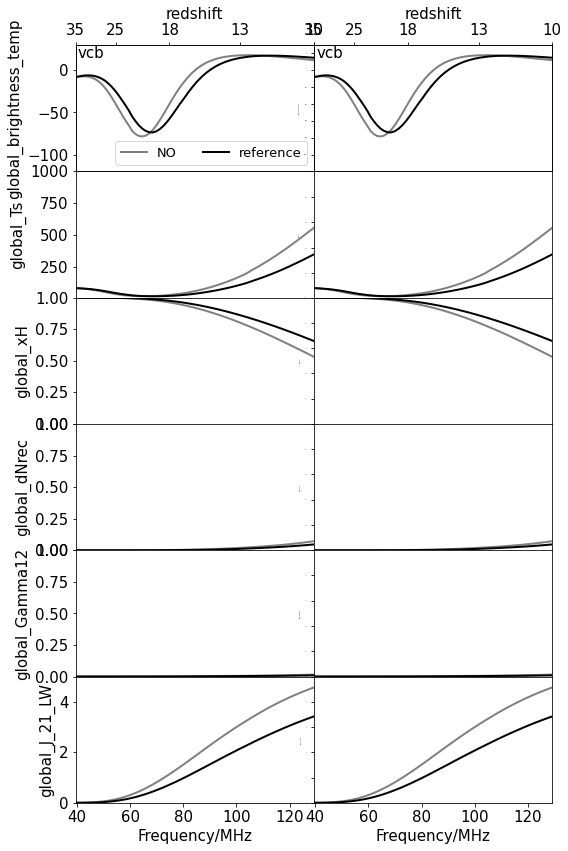

In [14]:
global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
#choose some to plot...
plot_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'Gamma12_box','J_21_LW_box')
ymins = [-120, 1e1, 0, 0, 0, 0]
ymaxs = [  30, 1e3, 1, 1, 1,5]
linestyles = ['-', '-',':','-.','-.',':']
colors     = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']
lws        = [2,2,2,2]

textss   = ['vcb','vcb']
factorss = [[0, 1],] * len(textss)
labelss  = [['NO', 'reference'],] * len(textss)


fig, axss = plt.subplots(len(plot_quantities), len(labelss),
                         sharex=True, figsize=(4*len(labelss),2*len(plot_quantities)))

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        factor = factors[kk]

        
        if kk==0:
            lightcone = lightcone_fid_novcb
        else:
            lightcone = lightcone_fid_vcb
        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)    
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
                         color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            
    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)
    for jj, global_quantity in enumerate(plot_quantities):
        axs[jj].set_ylim(ymins[jj], ymaxs[jj])
    axs[-1].set_xlabel('Frequency/MHz',fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)

    axs[0].set_xlim(1420.4 / (35 + 1.), 1420.4 / (10. + 1.))
    zlabels = np.array([10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.))
    ax2.set_xticklabels(zlabels.astype(np.str)) 
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[0].legend(loc='lower right', ncol=2,fontsize=13,fancybox=True,frameon=True)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
            axs[jj].yaxis.set_tick_params(labelsize=15)
    else:
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=0)
            axs[jj].yaxis.set_tick_params(labelsize=0)

plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)

 # varying parameters

let's vary paremeters that describe mini-halos and see the impact to the global signal

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"
    
We also have a NOmini model where mini-halos are not included

Note that I've run these simulations in parallel before this tutorial. With these setup, each took ~6h to finish. Here, running means read the cached outputs.

## global properties

## 21-cm power spectra

In [15]:
# define functions to calculate PS, following py21cmmc
from powerbox.tools import get_power

def compute_power(
   box,
   length,
   n_psbins,
   log_bins=True,
   ignore_kperp_zero=True,
   ignore_kpar_zero=False,
   ignore_k_zero=False,
):
    # Determine the weighting function required from ignoring k's.
    k_weights = np.ones(box.shape, dtype=np.int)
    n0 = k_weights.shape[0]
    n1 = k_weights.shape[-1]

    if ignore_kperp_zero:
        k_weights[n0 // 2, n0 // 2, :] = 0
    if ignore_kpar_zero:
        k_weights[:, :, n1 // 2] = 0
    if ignore_k_zero:
        k_weights[n0 // 2, n0 // 2, n1 // 2] = 0

    res = get_power(
        box,
        boxlength=length,
        bins=n_psbins,
        bin_ave=False,
        get_variance=False,
        log_bins=log_bins,
        k_weights=k_weights,
    )

    res = list(res)
    k = res[1]
    if log_bins:
        k = np.exp((np.log(k[1:]) + np.log(k[:-1])) / 2)
    else:
        k = (k[1:] + k[:-1]) / 2

    res[1] = k
    return res

def powerspectra(brightness_temp, n_psbins=50, nchunks=10, min_k=0.1, max_k=1.0, logk=True):
    data = []
    chunk_indices = list(range(0,brightness_temp.n_slices,round(brightness_temp.n_slices / nchunks),))

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(brightness_temp.n_slices)

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]
        chunklen = (end - start) * brightness_temp.cell_size

        power, k = compute_power(
            brightness_temp.brightness_temp[:, :, start:end],
            (BOX_LEN, BOX_LEN, chunklen),
            n_psbins,
            log_bins=logk,
        )
        data.append({"k": k, "delta": power * k ** 3 / (2 * np.pi ** 2)})
    return data

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/dft.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  freq = np.array([fftfreq(n, d=d, b=b) for n, d in zip(N, dx)])
/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/tools.py:106: UserWarning: One or more radial bins had no cells within it.
  warnings.warn("One or more radial bins had no cells within it.")
/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/tools.py:160: RuntimeWarning: invalid value encountered in true_divide
  rl = np.bincount(indx, weights=np.real(field.flatten()), minlength=len(sumweights)+2)[1:-1] / sumweights
/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/dft.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested 

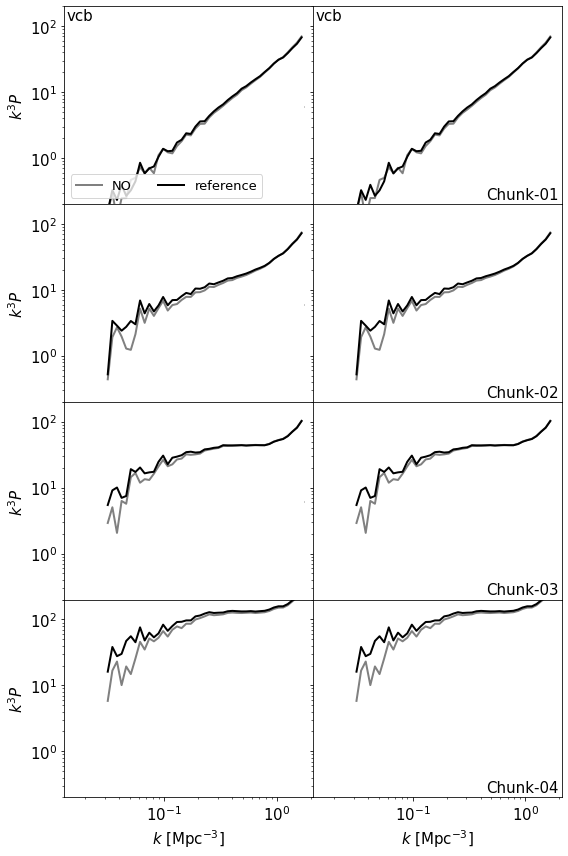

In [16]:
# do 5 chunks but only plot 1 - 4, the 0th has no power for minihalo models where xH=0
nchunks = 4

fig, axss = plt.subplots(nchunks, len(labelss), sharex=True,sharey=True,figsize=(4*len(labelss),3*(nchunks)),subplot_kw={"xscale":'log', "yscale":'log'})

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        factor = factors[kk]
        
        if kk==0:
            lightcone = lightcone_fid_vcbavg
        else:
            lightcone = lightcone_fid_vcb
        
        PS = powerspectra(lightcone)
        for ii in range(nchunks):
            axs[ii].plot(PS[ii+1]['k'], PS[ii+1]['delta'], color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
        
            if pp == len(textss)-1 and kk == 0:
                axs[ii].text(0.99, 0.01, 'Chunk-%02d'%(ii+1),horizontalalignment='right',verticalalignment='bottom',
                        transform=axs[ii].transAxes,fontsize = 15)
            
    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)

    axs[-1].set_xlabel("$k$ [Mpc$^{-3}$]",fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)
    
    if pp == 0:
        for ii in range(nchunks):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=15)
            axs[ii].yaxis.set_tick_params(labelsize=15)
    else:
        for ii in range(nchunks-1):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=0)
            axs[ii].yaxis.set_tick_params(labelsize=0)

axss[0,0].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)

 Now you know how minihalo can shape the 21-cm signal!

In [17]:
PSv= powerspectra(lightcone_fid_vcb)
PSvavg= powerspectra(lightcone_fid_vcbavg)

/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/dft.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  freq = np.array([fftfreq(n, d=d, b=b) for n, d in zip(N, dx)])
/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/tools.py:106: UserWarning: One or more radial bins had no cells within it.
  warnings.warn("One or more radial bins had no cells within it.")
/Users/julian/opt/anaconda3/lib/python3.8/site-packages/powerbox/tools.py:160: RuntimeWarning: invalid value encountered in true_divide
  rl = np.bincount(indx, weights=np.real(field.flatten()), minlength=len(sumweights)+2)[1:-1] / sumweights


No handles with labels found to put in legend.


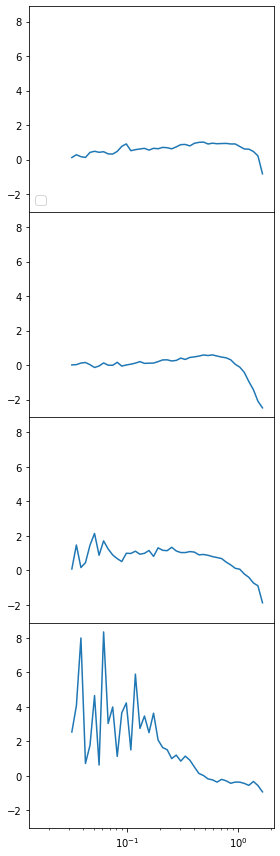

In [18]:
klist= PSv[0]['k']
P21diff = [(PSv[i]['delta']-PSvavg[i]['delta']) for i in range(nchunks)]

import matplotlib.pyplot as plt


fig, axss = plt.subplots(nchunks, 1, sharex=True,sharey=True,figsize=(2*len(labelss),3*(nchunks)),subplot_kw={"xscale":'log', "yscale":'linear'})

for ii in range(nchunks):
    axss[ii].plot(klist, P21diff[ii])

plt.xscale('log')
axss[0].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)